## Visualising Running Totals with Line Charts

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [14]:
data = pd.read_csv('../data/serieB_20-21.csv')

In [15]:
data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,I2,25/09/2020,15:45,Monza,Spal,0,0,D,0.0,0.0,...,1.69,-0.50,1.93,1.93,1.98,1.93,2.02,1.97,1.95,1.88
1,I2,26/09/2020,13:00,Brescia,Ascoli,1,1,D,1.0,1.0,...,1.73,-0.75,1.95,1.90,1.99,1.92,2.02,1.96,1.97,1.88
2,I2,26/09/2020,13:00,Cosenza,Virtus Entella,0,0,D,0.0,0.0,...,1.67,-0.25,1.90,1.95,1.93,1.98,1.96,2.00,1.89,1.94
3,I2,26/09/2020,13:00,Frosinone,Empoli,0,2,A,0.0,1.0,...,1.68,-0.25,1.85,2.00,1.88,2.03,1.98,2.05,1.85,1.98
4,I2,26/09/2020,13:00,Lecce,Pordenone,0,0,D,0.0,0.0,...,1.78,-0.50,1.95,1.90,1.97,1.93,2.01,1.95,1.95,1.88


In [16]:
#Create a list of unique teams from the home team column
Teams = data.HomeTeam.unique()

#Create a dictionary called TeamLists. There will be an entry for each team with the list [0]
TeamLists = {Team : [0] for Team in Teams}

In [17]:
#For each row in our dataframe, I want to do the following:
for row in data.itertuples():
    #Add the home and away team names to the correct variable
    Home = row.HomeTeam
    Away = row.AwayTeam
    
    #If the home team goals (FTHG column in the dataframe) are higher than the away team, give the correct points to each team
    if row.FTHG > row.FTAG:
        TeamLists[Home].append(3)
        TeamLists[Away].append(0)
    #If the home team goals are less than the away team, give the correct points
    elif row.FTHG < row.FTAG:
        TeamLists[Home].append(0)
        TeamLists[Away].append(3)
    #In any other case (a draw), give the correct points
    else:
        TeamLists[Home].append(1)
        TeamLists[Away].append(1)

In [19]:
TeamLists["Monza"]

[0,
 1,
 1,
 1,
 0,
 3,
 3,
 1,
 3,
 1,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 0,
 3,
 1,
 1,
 3,
 0,
 3,
 0,
 1,
 1,
 0,
 3,
 3,
 3,
 3,
 0]

In [20]:
Teams = data.HomeTeam.unique()
TeamLists = {Team : [0] for Team in Teams}

for row in data.itertuples():
    Home = row.HomeTeam
    Away = row.AwayTeam
    
    if row.FTHG > row.FTAG:
        TeamLists[Home].append(TeamLists[Home][-1]+3)
        TeamLists[Away].append(TeamLists[Away][-1]+0)
    elif row.FTHG < row.FTAG:
        TeamLists[Home].append(TeamLists[Home][-1]+0)
        TeamLists[Away].append(TeamLists[Away][-1]+3)
    else:
        TeamLists[Home].append(TeamLists[Home][-1]+1)
        TeamLists[Away].append(TeamLists[Away][-1]+1)

In [21]:
TeamLists["Monza"]

[0,
 1,
 2,
 3,
 3,
 6,
 9,
 10,
 13,
 14,
 14,
 17,
 20,
 20,
 23,
 26,
 29,
 30,
 31,
 34,
 35,
 36,
 39,
 39,
 42,
 43,
 44,
 47,
 47,
 50,
 50,
 51,
 52,
 52,
 55,
 58,
 61,
 64,
 64]

In [22]:
Matchday = list(range(0,39))

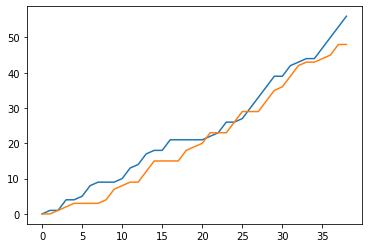

In [23]:
#Create a line plot with matchday and teamlist figures for two teams
plt.plot(Matchday, TeamLists["Brescia"])
plt.plot(Matchday, TeamLists["Cremonese"])

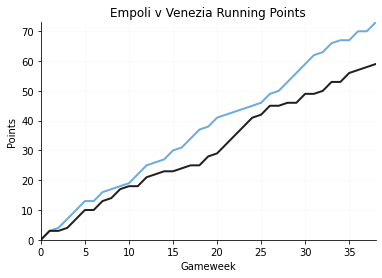

In [24]:
#Create the bare bones of what will be our visualisation
fig, ax = plt.subplots()

#Add our data as before, but setting colours and widths of lines
plt.plot(Matchday, TeamLists["Empoli"], color = "#6CABDD", linewidth=2)
plt.plot(Matchday, TeamLists["Venezia"], color = "#231F20", linewidth=2)

#Give the axes and plot a title each
plt.xlabel('Gameweek')
plt.ylabel('Points')
plt.title('Empoli v Venezia Running Points')

#Add a faint grey grid
plt.grid()
ax.xaxis.grid(color = "#F8F8F8")
ax.yaxis.grid(color = "#F9F9F9")

#Remove the margins between our lines and the axes
plt.margins(x=0,y=0)

#Remove the spines of the chart on the top and right sides
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)